## Experiment 1.b - Simulation of controlling the inverted pendulum on a cart with state controller.

---

### Equations:
- th'' = (g * sin(th) - u * cos(th)) / L
- u = Kp_th * th + Kd_th * th' + Kp_x * (x - x0) + Kd_x * x'

### System:
- th' = Y,
- Y' = (g * sin(th) - u * cos(th)) / L,
- x' = Z,
- Z' = u = Kp_th * th + Kd_th * Y + Kp_x * (x - x0) + Kd_x * Z,

### State: 
- [th, Y, x, Z]

---

## 0. Import libraries

In [13]:
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
import scipy.integrate as integrate
from scipy.integrate import odeint
import matplotlib.pyplot as pp
from math import pi, trunc
from numpy import sin, cos
import control as cn
import numpy as np

## 1. Define functions and constants initially

In [14]:
def trim(x, step):
    d = trunc(x / step)
    return step * d

In [15]:
def step(t):
	if t < 5:
		return .0
	elif t >= 5 and t < 10:
		return 1.
	elif t >= 10 and t < 15:
		return -0.5
	else:
		return .0

In [16]:
def derivatives(state, t):
	ds = np.zeros_like(state)

	_th = state[0]
	_Y = state[1]
	_x = state[2]
	_Z = state[3]

	# x0 = step(t)

	u = Kp_th * _th + Kd_th * _Y + Kp_x * (_x - x0) + Kd_x * _Z

	ds[0] = state[1]
	ds[1] = (g * sin(_th) - u * cos(_th)) / L
	ds[2] = state[3]
	ds[3] = u

	return ds

In [17]:
# Defining physical constants
g = 9.8
L = 1.5
m = 0.5

# Defining simulation constants
dt = 0.05
TMax = 5
t = np.arange(0.0, TMax, dt)

In [18]:
# Defining initial conditions
Y = .0 		# pendulum angular velocity
th = pi/10	# pendulum angle
x = .0		# cart position
x0 = 0		# desired cart position
Z = .0		# cart velocity

precision = 0.006
k = 1000.0	# Kalman filter coefficient

Kp_th = 50
Kd_th = 15
Kp_x = 3.1
Kd_x = 4.8

state = np.array([th, Y, x, Z, trim(th, precision), .0])

In [19]:
print(f't:\n{t}\n\nstate:\n{state}')

t:
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95]

state:
[0.31415927 0.         0.         0.         0.312      0.        ]


## 2. Starting the system

Integrating...
Done


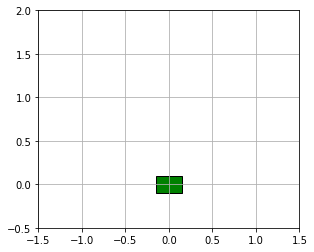

In [20]:
print("Integrating...")

# integrate your ODE using scipy.integrate.
solution = integrate.odeint(derivatives, state, t)
print("Done")

ths = solution[:, 0]
xs = solution[:, 2]

pxs = L * sin(ths) + xs
pys = L * cos(ths)

fig = pp.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-0.5, 2))
ax.set_aspect('equal')
ax.grid()

patch = ax.add_patch(Rectangle((0, 0), 0, 0, linewidth=1, edgecolor='k', facecolor='g'))

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

cart_width = 0.3
cart_height = 0.2

def init():
    line.set_data([], [])
    time_text.set_text('')
    patch.set_xy((-cart_width/2, -cart_height/2))
    patch.set_width(cart_width)
    patch.set_height(cart_height)
    return line, time_text, patch


def animate(i):
    thisx = [xs[i], pxs[i]]
    thisy = [0, pys[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    patch.set_x(xs[i] - cart_width/2)
    return line, time_text, patch

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(solution)), interval=25, blit=True, init_func=init)

pp.show()


## 3. Simulation of a simple pendulum

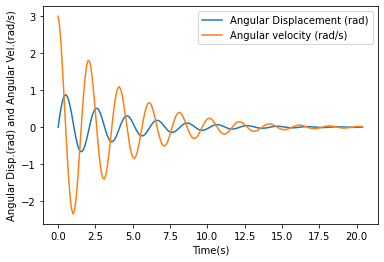

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [21]:
"""
Simulation of Simple pendulum
"""

# Importing libraries

import math
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import os

# Initial and end values
st = 0          # Start time (s)
et = 20.4       # End time (s)
ts = 0.1        # Time step (s)
g = 9.81        # Acceleration due to gravity (m/s^2)
L = 1           # Length of pendulum (m)
b = 0.5         # Damping factor (kg/s)
m = 1           # Mass of bob (kg)


# 1st order equations to solve in a function


"""
 theta1 is angular displacement at current time instant
 theta2 is angular velocity at current time instant
 dtheta2_dt is angular acceleration at current time instant
 dtheta1_dt is rate of change of angular displacement at current time instant i.e. same as theta2 
"""

def sim_pen_eq(t,theta):
		dtheta2_dt = (-b/m)*theta[1] + (-g/L)*np.sin(theta[0])
		dtheta1_dt = theta[1]
		return [dtheta1_dt, dtheta2_dt]



# main

theta1_ini = 0                 # Initial angular displacement (rad)
theta2_ini = 3                 # Initial angular velocity (rad/s)
theta_ini = [theta1_ini, theta2_ini]
t_span = [st,et+ts]
t = np.arange(st,et+ts,ts)
sim_points = len(t)
l = np.arange(0,sim_points,1)

theta12 = solve_ivp(sim_pen_eq, t_span, theta_ini, t_eval = t)
theta1 = theta12.y[0,:]
theta2 = theta12.y[1,:]
plt.plot(t,theta1,label='Angular Displacement (rad)')
plt.plot(t,theta2,label='Angular velocity (rad/s)')
plt.xlabel('Time(s)')
plt.ylabel('Angular Disp.(rad) and Angular Vel.(rad/s)')
plt.legend()
plt.show()



# Simulation

x = L*np.sin(theta1)
y = -L*np.cos(theta1)


for point in l:
		plt.figure()
		plt.plot(x[point],y[point],'bo',markersize=20)
		plt.plot([0,x[point]], [0,y[point]])
		plt.xlim(-L-0.5,L+0.5)
		plt.ylim(-L-0.5,L+0.5)
		plt.xlabel('x-direction')
		plt.ylabel('y-direction')
		filenumber = point
		filenumber=format(filenumber,"05")
		filename="image{}.png".format(filenumber)
		plt.savefig(filename)
		plt.close()


os.system("ffmpeg -f image2 -r 20 -i image%05d.png -vcodec mpeg4 -y movie.avi")		
